<a href="https://colab.research.google.com/github/Naiker911/taxi-aggregator/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D1%84%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%C2%ABData_Scientist%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Тема:**

«Формирование стратегии крупного агрегатора такси (поиск инсайтов, проверка гипотезы, составление рекомендаций стейкхолдерам, построение предиктивной модели)».

**Цель задания:**

– Собрать все полученные на курсе знания воедино.

– Закрепить умение исследовать данные, проверять гипотезу, делать выводы и презентовать результаты.

– Закрепить умение исследовать внешние факторы, строить модель, получать прогноз и делать выводы.


Загрузка данных

In [ ]:
import pandas as pd

In [ ]:
dip_taxi = pd.read_csv(f'/content/drive/Othercomputers/Ноутбук/Data Scense/dip_hw_x_taxi.csv')

In [ ]:
dip_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   int64  
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


В дата сете имеется 6 столбцов в каждом из которых 2000 строк, пропусков нет. Посмотрим на первые 10 строк

In [ ]:
dip_taxi.head(10)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1
5,2601,4,8,46.301,Premium,0
6,2710,4,19,2.142,Comfort,1
7,2911,7,11,42.588,Premium,1
8,2948,6,23,67.540,Premium,1
9,3013,2,16,33.417,Delivery,1


In [ ]:
dip_taxi['offer_class_group'].unique()

array(['Premium', 'Delivery', 'Comfort', 'Economy'], dtype=object)

В столбце offer_class_group видим уникальные значения класса такси 'Premium' - Премиум, 'Delivery' - Доставка, 'Comfort' - Комфорт, 'Economy' - Эконом

Рассчитаем основные описательные статистики
(среднее, минимум, 25-50-75-персентили, максимум)


In [ ]:
dip_taxi.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,11.608500,26.275848,0.587000
std,270556.211847,2.007256,6.918465,18.876336,0.492496
min,412.000000,1.000000,0.000000,0.024000,0.000000
25%,227126.500000,2.000000,6.000000,12.177000,0.000000
50%,458637.000000,4.000000,12.000000,22.828500,1.000000
75%,709420.250000,6.000000,18.000000,36.434250,1.000000
max,919196.000000,7.000000,23.000000,138.950000,1.000000


In [ ]:
def Stat_osn(X):
  print('Рассчитаем основные описательные статистики для колонки',X)
  print('Среднее =', dip_taxi[X].mean())
  print('Минимум =', dip_taxi[X].min())
  print('25-квантиль =', dip_taxi[X].quantile(0.25))
  print('25-квантиль =', dip_taxi[X].quantile(0.5))
  print('25-квантиль =', dip_taxi[X].quantile(0.75))
  print('Максимум =', dip_taxi[X].max())

In [ ]:
Stat_osn('order_gk')

Рассчитаем основные описательные статистики для колонки order_gk
Среднее = 462807.384
Минимум = 412
25-квантиль = 227126.5
25-квантиль = 458637.0
25-квантиль = 709420.25
Максимум = 919196


In [ ]:
Stat_osn('weekday_key')

Рассчитаем основные описательные статистики для колонки weekday_key
Среднее = 4.044
Минимум = 1
25-квантиль = 2.0
25-квантиль = 4.0
25-квантиль = 6.0
Максимум = 7


In [ ]:
Stat_osn('hour_key')

Рассчитаем основные описательные статистики для колонки hour_key
Среднее = 11.6085
Минимум = 0
25-квантиль = 6.0
25-квантиль = 12.0
25-квантиль = 18.0
Максимум = 23


In [ ]:
Stat_osn('distance_km')

Рассчитаем основные описательные статистики для колонки distance_km
Среднее = 26.2758475
Минимум = 0.024
25-квантиль = 12.177
25-квантиль = 22.8285
25-квантиль = 36.43425
Максимум = 138.95


In [ ]:
Stat_osn('driver_response')

Рассчитаем основные описательные статистики для колонки driver_response
Среднее = 0.587
Минимум = 0
25-квантиль = 0.0
25-квантиль = 1.0
25-квантиль = 1.0
Максимум = 1


Вычислим количество значений по классам такси

In [ ]:
dip_taxi['offer_class_group'].value_counts()

Premium     500
Delivery    500
Comfort     500
Economy     500
Name: offer_class_group, dtype: int64

По всем классам равномерное распределение

Визуализируем распределение дистанций поездок

In [ ]:
import seaborn as sns
import numpy as np

<Axes: xlabel='distance_km', ylabel='Count'>

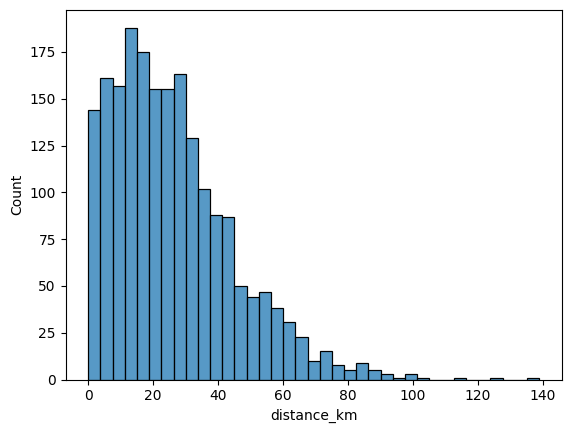

In [ ]:
sns.histplot(dip_taxi['distance_km'])

Как показывает гистограмма - самое большое количество поездок происходит на расстояние до 20 киллометров

Визуализируем распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса

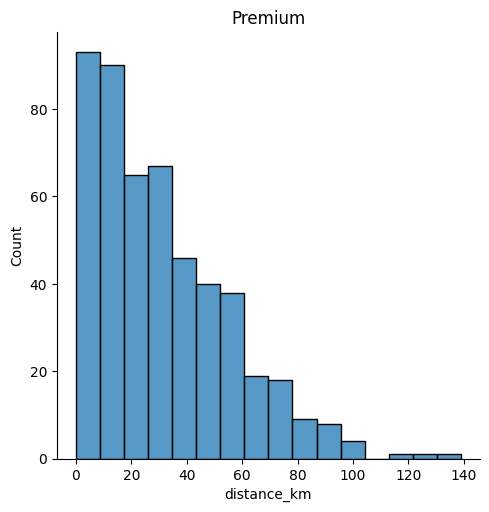

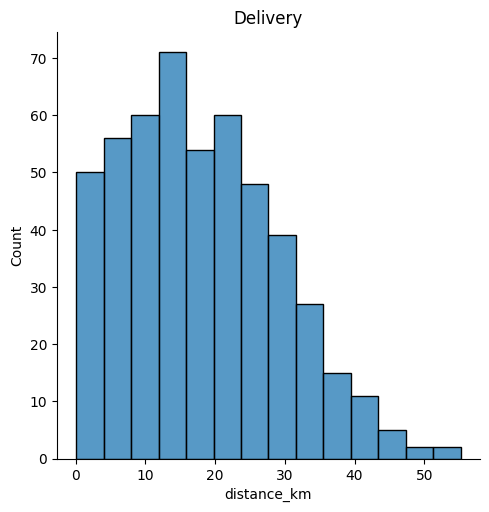

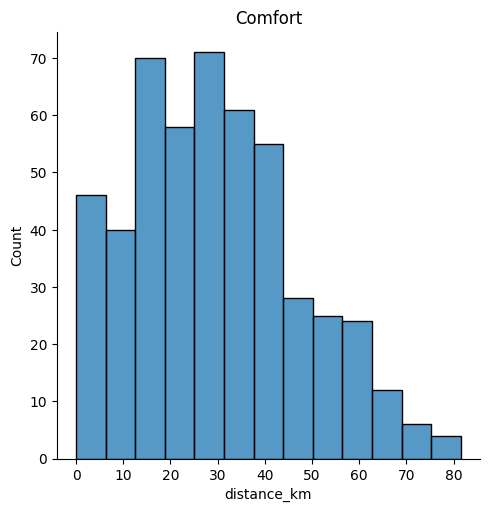

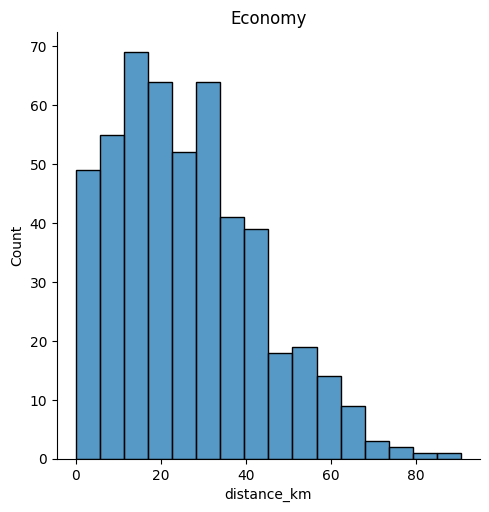

In [ ]:
for x in dip_taxi['offer_class_group'].unique():
  sns.displot(dip_taxi[dip_taxi['offer_class_group'] == x]['distance_km']).set(title = x)

Премиум такси используют в основном на дальние поездки, доставку осущевстляют по большей части до 30 киллометров, на комфорте люди совершают поездки до 80 киллометров, а экономом пользуются в основном на растояния до 75 киллометров. Эконом и Комфорт поездки очень похожи по своему распределению визуально

Сформируем выборки по эконом и комфорт-классам. Визуализируем пересечение интервалов дистанций этих классов

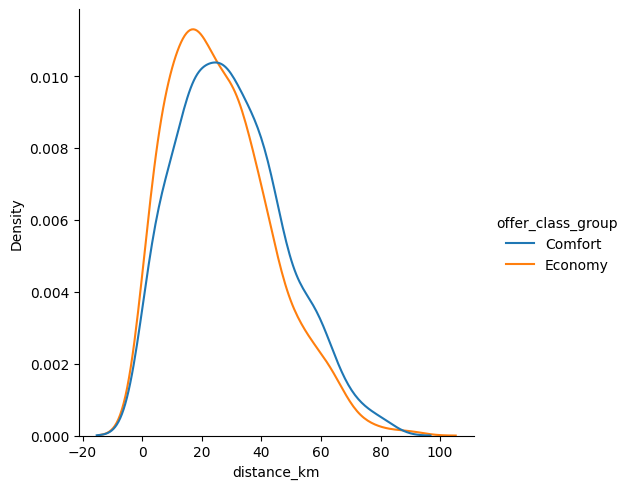

In [ ]:
sns.displot(data=dip_taxi[dip_taxi.offer_class_group.isin(['Economy', 'Comfort'])],
            x='distance_km',
            hue='offer_class_group',
            kind='kde')

Распределения очень похожи и даже по плотности

Проведём стат. тест (поможет: функция scipy.stats.ttest_ind), проверим гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)

In [ ]:
from scipy.stats import ttest_ind

econ = dip_taxi[dip_taxi['offer_class_group'] == 'Economy']
comf = dip_taxi[dip_taxi['offer_class_group'] == 'Comfort']

In [ ]:
t, p_value = ttest_ind(econ['distance_km'], comf['distance_km'])
t, p_value

(-3.1706426042389815, 0.0015673809987275479)

Выводы по результатам проведения стат. теста

Так как pvalue = 0.00156, что меньше уровня значимости 0.05, это говорит о том, что нулевую гипотезу можем отклонить, то есть среднее двух распределений различны и это статистически значимо.

Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)

In [ ]:
print('Среднее расстояние для эконом класса на поездки =',econ['distance_km'].mean())

Среднее расстояние для эконом класса на поездки = 26.283098


In [ ]:
print('Среднее расстояние для комфорт класса на поездки =',comf['distance_km'].mean())

Среднее расстояние для комфорт класса на поездки = 29.758916000000003


Вывод:

На дальние поездки люди предпочитают пользоваться комфорт классом

**Дополнительное задание:**

Вы справились с исследованием данных! Ваша стажировка продолжается, в мире произошли непредвиденные события — пандемия COVID-19. Вам доверена срочная задача. Чтобы сформировать понимание о стратегии компании, необходимо определить возможные сценарии дальнейшего развития событий.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
covid = pd.read_csv(f'/content/drive/Othercomputers/Ноутбук/Data Scense/dip_hw_covid.csv')

In [ ]:
covid.head()

,date,country,confirmed,deaths
0,2020-01-22 00:00:00,Russia,0.0,0.0
1,2020-01-22 00:00:00,US,1.0,0.0
2,2020-01-23 00:00:00,Russia,0.0,0.0
3,2020-01-23 00:00:00,US,1.0,0.0
4,2020-01-24 00:00:00,Russia,0.0,0.0


Рассчитайте коэффициент корреляции между заболеваемостью и смертностью

In [ ]:
covid.corr()

<ipython-input-192-fb44221c9cc2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid.corr()


,confirmed,deaths
confirmed,1.000000,0.989836
deaths,0.989836,1.000000


Видим что вроде как есть сильная корреляция между кол-вом заболевших и смертностью

Визуализируйте динамики заболеваемости и смертности по доступным странам в отдельности, сравните характер распространения

In [ ]:
covid['country'].value_counts()

Russia    558
US        558
Name: country, dtype: int64

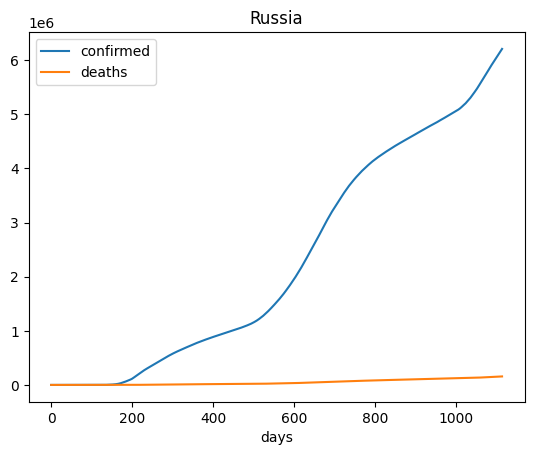

In [ ]:
rus = covid[covid['country'] == 'Russia']
plt.plot(rus['confirmed'], label='confirmed')
plt.plot(rus['deaths'], label='deaths')
plt.legend()
plt.title('Russia')
plt.xlabel('days');

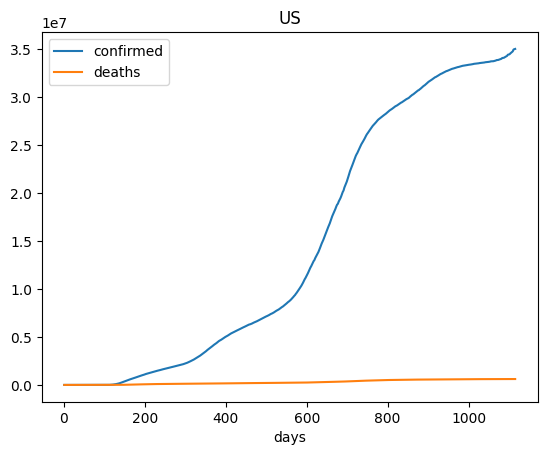

In [ ]:
us = covid[covid['country'] == 'US']
plt.plot(us['confirmed'], label='confirmed')
plt.plot(us['deaths'], label='deaths')
plt.legend()
plt.title('US')
plt.xlabel('days');

По графикам видим что заболевания растут с каждым дём интенсивно, а смертность почти не возрастает

Постройте модель линейной регрессии по смертям от заболеваемости и вычислите прогноз количества смертей в России для 25 000 000 случаев заражений (примечание: сформируйте выборку по России, выделите признак и целевую переменную [используем 100% данных для обучения], постройте прогноз смертей для 25 000 000 заболевших [поможет метод predict], сделайте выводы по полученному прогнозу)

In [ ]:
X = rus[['confirmed']]
y = rus['deaths']

Визуализируем зависимость пежду заболевшими и смертельными исходами.

По Х - заболевшие, по у- смертельные исходы

Text(0, 0.5, 'deaths')

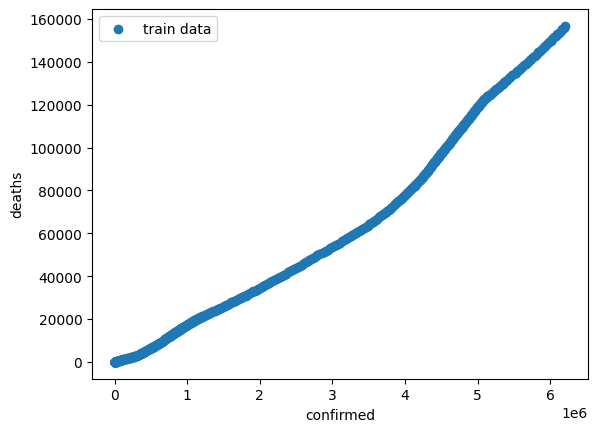

In [ ]:
plt.scatter(X, y, label='train data')
plt.legend();
plt.xlabel('confirmed')
plt.ylabel('deaths')

Очень хорошая линейная связь, выбросов нету

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
import numpy as np

test_X = np.array([[25_000_000]])
pred = lr.predict(test_X)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([582420.3846451])

На 25 мил заболеваний 583 тыс смертельных исходов по предсказанию модели

---



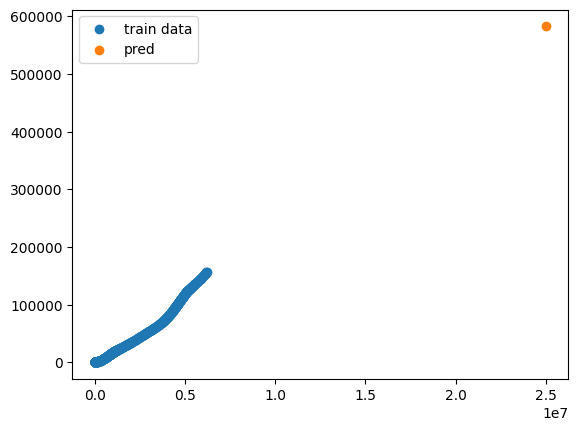

In [ ]:
plt.scatter(X, y, label='train data')
plt.scatter(test_X, pred, label='pred')
plt.legend();

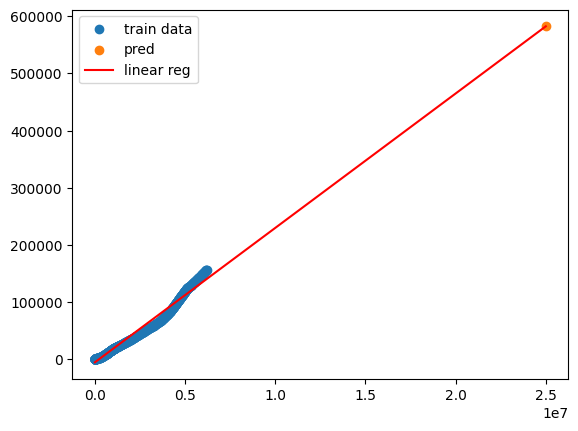

In [ ]:
a = lr.coef_[0]
b = lr.intercept_

line_x = np.linspace(0, 25_000_000, 100)
line_y = a * line_x + b

plt.scatter(X, y, label='train data');
plt.scatter(test_X, pred, label='pred')
plt.plot(line_x, line_y, c='r', label='linear reg')
plt.legend();

По предсказанию модели на 2.5 миллионов заболевших будет всего 583 тысячи смертельных исходов, что составляет чуть более 2 % от числа заболевших

**Вы исследовали данные компании! Но у инфраструктурного отдела произошли неполадки, возникло подозрение о сбое работы логики записи состоявшихся поездок. Вам доверена задача проверить наличие ошибок в имеющихся данных, чтобы удостовериться в корректности сделанных выводов и помочь коллегам.**

In [ ]:
checkT = pd.read_csv('/content/drive/Othercomputers/Ноутбук/Data Scense/dip_db_check_taxi.csv')
checkT.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group
0,4957,3,27,14.239,1
1,9314,3,21,39.518,2
2,13922,2,21,17.203,2
3,37826,5,19,36.971,2
4,38936,2,19,49.634,2


In [ ]:
checkT.shape

(100, 5)

In [ ]:
checkT['order_gk'].value_counts()

4957      1
549348    1
635251    1
626856    1
620982    1
         ..
204791    1
200303    1
197454    1
194882    1
867363    1
Name: order_gk, Length: 100, dtype: int64

In [ ]:
checkT = checkT.set_index('order_gk')
checkT.head()

,weekday_key,hour_key,distance_km,offer_class_group
order_gk,,,,
4957,3,27,14.239,1
9314,3,21,39.518,2
13922,2,21,17.203,2
37826,5,19,36.971,2
38936,2,19,49.634,2


In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5, metric='euclidean')
neigh.fit(checkT)

NearestNeighbors(metric='euclidean')

In [ ]:
result = pd.DataFrame(columns=['target', 'closest_dist', 'closest_idx'])

for idx in checkT.index:
    res = neigh.kneighbors(checkT.loc[[idx]], return_distance=True)

    result = pd.concat(
        [result,
         pd.DataFrame({
              'target': [idx],
              'closest_dist': [res[0][0][1]],
              'closest_idx': [checkT.iloc[res[1][0][1]].name]
          })
         ]
      )

Посмотрим на дистанцию между объектами, если дистанция маленькая значит скорей всего это дубликаты

In [ ]:
result.sort_values('closest_dist')[:10]

,target,closest_dist,closest_idx
0,94794,0.033000,330292
0,330292,0.033000,94794
0,412671,1.092923,597863
0,597863,1.092923,412671
0,293849,1.441472,190596
0,190596,1.441472,293849
0,699904,1.448000,86889
0,86889,1.448000,699904
0,558065,1.460307,516190
0,516190,1.460307,558065


Посмотрим на эти объекты

In [ ]:
print(f'{checkT.loc[94794]}\n\n{checkT.loc[330292]}')

weekday_key           2.000
hour_key             20.000
distance_km          57.879
offer_class_group     3.000
Name: 94794, dtype: float64

weekday_key           2.000
hour_key             20.000
distance_km          57.846
offer_class_group     3.000
Name: 330292, dtype: float64


Если киллометраж (distance_km) поездки чуть отличается, значит скорей всего это дубликат

In [ ]:
print(f'{checkT.loc[558065]}\n\n{checkT.loc[516190]}')

weekday_key           2.000
hour_key             27.000
distance_km          28.692
offer_class_group     1.000
Name: 558065, dtype: float64

weekday_key           2.000
hour_key             26.000
distance_km          28.328
offer_class_group     2.000
Name: 516190, dtype: float64


In [ ]:
print(f'{checkT.loc[597863]}\n\n{checkT.loc[412671]}')

weekday_key           3.000
hour_key             20.000
distance_km          22.563
offer_class_group     3.000
Name: 597863, dtype: float64

weekday_key           3.000
hour_key             21.000
distance_km          22.122
offer_class_group     3.000
Name: 412671, dtype: float64


По расстоянию очень сильно похожи только первые два заказа, удалим первый заказ

In [ ]:
checkT = checkT.drop(index=[94794])
checkT.head()

,weekday_key,hour_key,distance_km,offer_class_group
order_gk,,,,
4957,3,27,14.239,1
9314,3,21,39.518,2
13922,2,21,17.203,2
37826,5,19,36.971,2
38936,2,19,49.634,2


In [ ]:
neigh = NearestNeighbors(n_neighbors=5, metric='euclidean')
neigh.fit(checkT)

NearestNeighbors(metric='euclidean')

In [ ]:
result = pd.DataFrame(columns=['target', 'closest_dist', 'closest_idx'])

for idx in checkT.index:
    res = neigh.kneighbors(checkT.loc[[idx]], return_distance=True)

    result = pd.concat(
        [result,
         pd.DataFrame({
              'target': [idx],
              'closest_dist': [res[0][0][1]],
              'closest_idx': [checkT.iloc[res[1][0][1]].name]
          })
         ]
      )

In [ ]:
result.sort_values('closest_dist')[:10]

,target,closest_dist,closest_idx
0,597863,1.092923,412671
0,412671,1.092923,597863
0,190596,1.441472,293849
0,293849,1.441472,190596
0,86889,1.448000,699904
0,699904,1.448000,86889
0,516190,1.460307,558065
0,558065,1.460307,516190
0,674519,1.504000,848459
0,848459,1.504000,674519


**Вывод:**

По расстоянию между объектами можно найти дубликаты и удалить их. Вполне возможно что в БД могут встречаться дубликаты из-за незначительной разности в расстояниях поездок и времени заказа. Но их очень мало. В целом БД справляется со своей работой.